In [1]:
import numpy as np
import pandas as pd
import os
import librosa
import wave
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# to mount drive

# from google.colab import drive
# drive.mount('/content/drive')


In [3]:
def extract_mfcc(wav_file_name):
    y, sr = librosa.load(wav_file_name)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfccs

In [4]:
# Initialize lists to store extracted labels and features
radvess_speech_labels = []
ravdess_speech_data = []

# Walk through the directory to access the audio files
for dirname, _, filenames in os.walk("ravdess/"):
    for filename in filenames:
        # Extract label from the filename
        radvess_speech_labels.append(int(filename[7:8]) - 1)   # Extract the label from the filename
        # Extract features using the previously defined extract_mfcc function
        wav_filename = os.path.join(dirname, filename)
        ravdess_speech_data.append(extract_mfcc(wav_filename))

print("Finish Loading the Dataset")

Finish Loading the Dataset


In [5]:
# Mapping of numerical labels to emotions
emotions = {1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'}

In [6]:
ravdess_speech_data

In [7]:
#### convert data and label to array

ravdess_speech_data_array = np.asarray(ravdess_speech_data) 
ravdess_speech_label_array = np.array(radvess_speech_labels)
ravdess_speech_label_array.shape # get tuple of array dimensions

### make categorical labels

labels_categorical = to_categorical(ravdess_speech_label_array) # converts
labels_categorical.shape


(2880, 8)

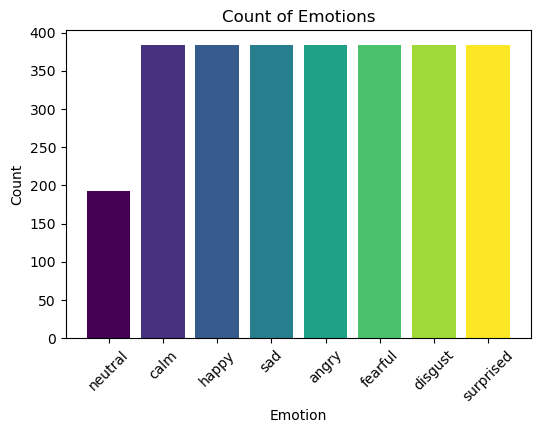

In [8]:
# Count occurrences of each emotion
emotion_counts = np.sum(labels_categorical, axis=0)

# Extract emotion labels for plotting
emotion_labels = [emotions[i+1] for i in range(len(emotions))]
colors = plt.cm.viridis(np.linspace(0, 1, len(emotion_labels))) 

# Plot the count of emotions with different colors for each bar
plt.figure(figsize=(6, 4))
plt.bar(emotion_labels, emotion_counts, color=colors)
plt.title('Count of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [9]:
ravdess_speech_data_array

In [10]:
labels_categorical

In [11]:
x_train,x_test,y_train,y_test = train_test_split(np.array(ravdess_speech_data_array), labels_categorical, test_size=0.20, random_state = 9)

In [12]:
# Split the training, validating, and testing sets

number_of_samples = ravdess_speech_data_array.shape[0]
training_samples = int(number_of_samples * 0.8)
validation_samples=int(number_of_samples * 0.1 )
test_samples=int(number_of_samples * 0.1)

In [13]:
def create_model_LSTM():
    model = Sequential()
    model.add(LSTM(128, return_sequences=False, input_shape=(40, 1)))
    model.add(Dense(64))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(32))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(8))
    model.add(Activation('softmax'))

    # Configures the model for training
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

    return model

In [14]:
w = np.expand_dims(ravdess_speech_data_array[:training_samples],-1) #reshaping

In [15]:
w.shape

(2304, 40, 1)

In [16]:
 model_A = create_model_LSTM()

In [17]:
history = model_A.fit(np.expand_dims(ravdess_speech_data_array[:training_samples], -1), 
                      labels_categorical[:training_samples], 
        validation_data=(np.expand_dims(ravdess_speech_data_array[training_samples: training_samples+validation_samples], -1), 
                    labels_categorical[training_samples: training_samples+validation_samples]), epochs=130, shuffle=True)


Epoch 1/130


72/72 [==============================] - 5s 23ms/step - loss: 2.0678 - accuracy: 0.1467 - val_loss: 2.0286 - val_accuracy: 0.1528
Epoch 2/130
72/72 [==============================] - 1s 13ms/step - loss: 2.0159 - accuracy: 0.1936 - val_loss: 1.9759 - val_accuracy: 0.2361
Epoch 3/130
72/72 [==============================] - 1s 12ms/step - loss: 1.9685 - accuracy: 0.2174 - val_loss: 1.9067 - val_accuracy: 0.2882
Epoch 4/130
72/72 [==============================] - 1s 16ms/step - loss: 1.9362 - accuracy: 0.2322 - val_loss: 1.8810 - val_accuracy: 0.2569
Epoch 5/130
72/72 [==============================] - 1s 19ms/step - loss: 1.8944 - accuracy: 0.2569 - val_loss: 1.8354 - val_accuracy: 0.2882
Epoch 6/130
72/72 [==============================] - 1s 17ms/step - loss: 1.8805 - accuracy: 0.2721 - val_loss: 1.8024 - val_accuracy: 0.3125
Epoch 7/130
72/72 [==============================] - 1s 13ms/step - loss: 1.8596 - accuracy: 0.2830 - val_loss: 1.8459 - val_accuracy: 0.2743
Epoc

72/72 [==============================] - 2s 23ms/step - loss: 0.7162 - accuracy: 0.7339 - val_loss: 0.8354 - val_accuracy: 0.6736
Epoch 56/130
72/72 [==============================] - 2s 23ms/step - loss: 0.7558 - accuracy: 0.7296 - val_loss: 0.8793 - val_accuracy: 0.6667
Epoch 57/130
72/72 [==============================] - 2s 23ms/step - loss: 0.6721 - accuracy: 0.7565 - val_loss: 0.8427 - val_accuracy: 0.6806
Epoch 58/130
72/72 [==============================] - 2s 22ms/step - loss: 0.6588 - accuracy: 0.7587 - val_loss: 0.7487 - val_accuracy: 0.7153
Epoch 59/130
72/72 [==============================] - 2s 22ms/step - loss: 0.6424 - accuracy: 0.7756 - val_loss: 0.8335 - val_accuracy: 0.6944
Epoch 60/130
72/72 [==============================] - 2s 23ms/step - loss: 0.7541 - accuracy: 0.7305 - val_loss: 0.9381 - val_accuracy: 0.6528
Epoch 61/130
72/72 [==============================] - 2s 23ms/step - loss: 0.6463 - accuracy: 0.7674 - val_loss: 0.7691 - val_accuracy: 0.7188
Epoch 62/130

72/72 [==============================] - 2s 22ms/step - loss: 0.1773 - accuracy: 0.9440 - val_loss: 0.1028 - val_accuracy: 0.9792
Epoch 113/130
72/72 [==============================] - 2s 23ms/step - loss: 0.1773 - accuracy: 0.9466 - val_loss: 0.2332 - val_accuracy: 0.9410
Epoch 114/130
72/72 [==============================] - 2s 22ms/step - loss: 0.2332 - accuracy: 0.9275 - val_loss: 0.2056 - val_accuracy: 0.9410
Epoch 115/130
72/72 [==============================] - 2s 22ms/step - loss: 0.2844 - accuracy: 0.9184 - val_loss: 0.3298 - val_accuracy: 0.9062
Epoch 116/130
72/72 [==============================] - 2s 22ms/step - loss: 0.3123 - accuracy: 0.9141 - val_loss: 0.1491 - val_accuracy: 0.9653
Epoch 117/130
72/72 [==============================] - 2s 22ms/step - loss: 0.1661 - accuracy: 0.9514 - val_loss: 0.0965 - val_accuracy: 0.9722
Epoch 118/130
72/72 [==============================] - 2s 23ms/step - loss: 0.1120 - accuracy: 0.9701 - val_loss: 0.0680 - val_accuracy: 0.9826
Epoch 

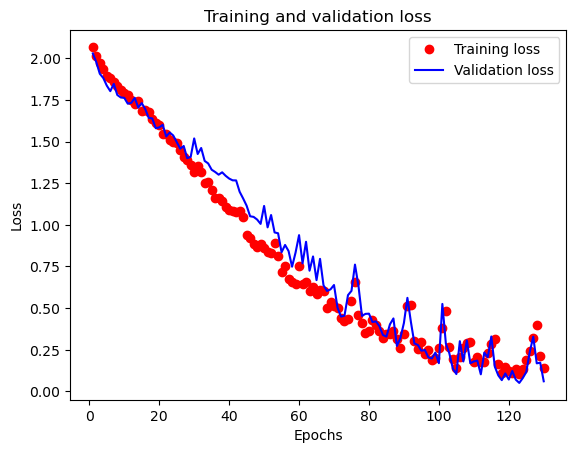

In [18]:
### loss plot for LSTM model

loss=history.history['loss' ]
val_loss=history.history['val_loss']
epochs=range(1, len (loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

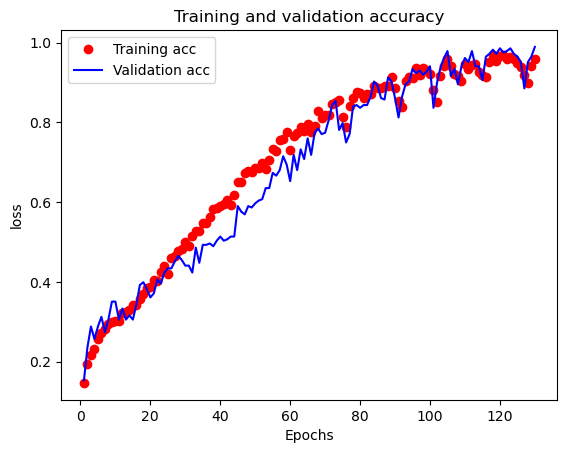

In [19]:
### accuracy plot for LSTM model

acc = history.history['accuracy']
val_acc =history.history['val_accuracy']
plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [20]:

model_A.evaluate(np.expand_dims(ravdess_speech_data_array[training_samples + validation_samples:], -1), labels_categorical[training_samples + validation_samples:])

9/9 [==============================] - 0s 18ms/step - loss: 0.0595 - accuracy: 0.9896


[0.059540051966905594, 0.9895833134651184]

In [21]:
# Generate predictions using the model on the test data
y_pred = model_A.predict(x_test)

# Calculate confusion matrix
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert one-hot encoded y_test back to numerical labels
y_true_labels = np.argmax(y_test, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

18/18 [==============================] - 1s 13ms/step


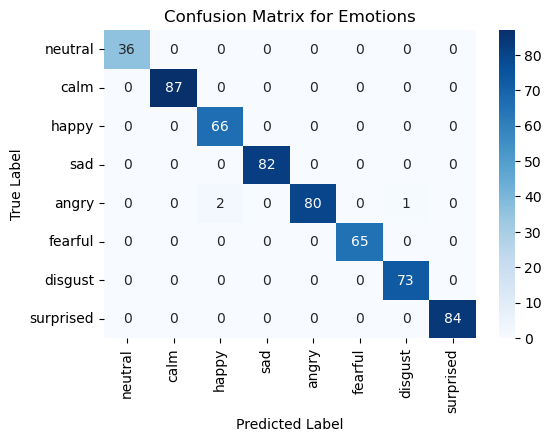

In [22]:
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(emotions.values()), yticklabels=list(emotions.values()))
plt.title('Confusion Matrix for Emotions')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [23]:
def predict(wav_filepath):
  test_point=extract_mfcc(wav_filepath)
  test_point=np.reshape(test_point,newshape=(1,40,1))
  predictions=model_A.predict(test_point)
  print(emotions[np.argmax(predictions[0])+1])

In [24]:
model_A.save('mymodel.h5')